In [7]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout,Conv2D
from keras.utils import to_categorical
from keras.optimizers import Adam, Nadam
from keras.activations import softmax,relu, elu
from keras.losses import categorical_crossentropy, logcosh
import talos as ta
from talos import live
from keras.utils import plot_model
import pydot
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def read_data():
    train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
    train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
    test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
    test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')
    return train_images,train_labels,test_images,test_labels

In [3]:
def preprocessing(images,labels):
    rows,cols,channels = 28,28,1
    number_class_labels = len(np.unique(labels))
    images = images.reshape(images.shape[0], rows, cols, channels)
    images = images.astype('float32')
    images /= 255
    labels = to_categorical(labels, number_class_labels)
    return images,labels

In [12]:
def cnn_model_before_tuning(train_images,train_labels,number_of_iterations):
    model = Sequential()
    model.add(Conv2D(32,(3,3), input_shape = (28,28,1),activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 10, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    history = model.fit(train_images,train_labels, batch_size=25, 
                                               epochs=number_of_iterations, verbose=1, validation_split = 0.1, shuffle = True)
    return model,history

In [13]:
train_images_all,train_labels_all,test_images_all,test_labels_all = read_data()
train_image_pr, train_label_pr = preprocessing(train_images_all,train_labels_all)
test_images, test_labels = preprocessing(test_images_all,test_labels_all)
train_images, val_images, train_labels, val_labels = train_test_split(train_image_pr, train_label_pr, test_size=0.2, 
                                                                      random_state=1) 

In [14]:
epochs = 3
model,history = cnn_model_before_tuning(train_images, train_labels,epochs) 

Train on 43200 samples, validate on 4800 samples
Epoch 1/3


15850/43200 [==========>...................] - ETA: 10:02 - loss: 2.3181 - acc: 0.08 - ETA: 2:55 - loss: 2.2758 - acc: 0.1400 - ETA: 1:54 - loss: 2.2453 - acc: 0.234 - ETA: 1:30 - loss: 2.1770 - acc: 0.284 - ETA: 1:17 - loss: 2.1160 - acc: 0.329 - ETA: 1:09 - loss: 2.0460 - acc: 0.365 - ETA: 1:03 - loss: 1.9831 - acc: 0.395 - ETA: 59s - loss: 1.9196 - acc: 0.416 - ETA: 55s - loss: 1.8560 - acc: 0.43 - ETA: 53s - loss: 1.7869 - acc: 0.45 - ETA: 51s - loss: 1.7147 - acc: 0.47 - ETA: 49s - loss: 1.6760 - acc: 0.48 - ETA: 48s - loss: 1.6113 - acc: 0.50 - ETA: 47s - loss: 1.5503 - acc: 0.52 - ETA: 46s - loss: 1.5129 - acc: 0.53 - ETA: 45s - loss: 1.4662 - acc: 0.54 - ETA: 44s - loss: 1.4308 - acc: 0.55 - ETA: 43s - loss: 1.3858 - acc: 0.56 - ETA: 43s - loss: 1.3632 - acc: 0.57 - ETA: 42s - loss: 1.3313 - acc: 0.58 - ETA: 41s - loss: 1.3006 - acc: 0.59 - ETA: 41s - loss: 1.2720 - acc: 0.60 - ETA: 40s - loss: 1.2461 - acc: 0.61 - ETA: 40s - loss: 1.2273 - acc: 0.62 - ETA: 40s - loss: 1.2017 -

43200/43200 [==============================] - ETA: 8s - loss: 0.3224 - acc: 0.902 - ETA: 8s - loss: 0.3220 - acc: 0.902 - ETA: 8s - loss: 0.3218 - acc: 0.902 - ETA: 8s - loss: 0.3214 - acc: 0.902 - ETA: 8s - loss: 0.3209 - acc: 0.902 - ETA: 8s - loss: 0.3207 - acc: 0.902 - ETA: 8s - loss: 0.3203 - acc: 0.902 - ETA: 8s - loss: 0.3199 - acc: 0.902 - ETA: 8s - loss: 0.3197 - acc: 0.902 - ETA: 8s - loss: 0.3193 - acc: 0.903 - ETA: 8s - loss: 0.3187 - acc: 0.903 - ETA: 8s - loss: 0.3182 - acc: 0.903 - ETA: 8s - loss: 0.3178 - acc: 0.903 - ETA: 7s - loss: 0.3175 - acc: 0.903 - ETA: 7s - loss: 0.3173 - acc: 0.903 - ETA: 7s - loss: 0.3168 - acc: 0.903 - ETA: 7s - loss: 0.3167 - acc: 0.903 - ETA: 7s - loss: 0.3164 - acc: 0.903 - ETA: 7s - loss: 0.3158 - acc: 0.904 - ETA: 7s - loss: 0.3153 - acc: 0.904 - ETA: 7s - loss: 0.3152 - acc: 0.904 - ETA: 7s - loss: 0.3149 - acc: 0.904 - ETA: 7s - loss: 0.3147 - acc: 0.904 - ETA: 7s - loss: 0.3144 - acc: 0.904 - ETA: 7s - loss: 0.3143 - acc: 0.904 - ETA

16050/43200 [==========>...................] - ETA: 36s - loss: 0.3999 - acc: 0.92 - ETA: 34s - loss: 0.1451 - acc: 0.97 - ETA: 33s - loss: 0.1342 - acc: 0.96 - ETA: 33s - loss: 0.1630 - acc: 0.94 - ETA: 33s - loss: 0.1534 - acc: 0.94 - ETA: 32s - loss: 0.1643 - acc: 0.94 - ETA: 32s - loss: 0.1631 - acc: 0.93 - ETA: 32s - loss: 0.1518 - acc: 0.94 - ETA: 33s - loss: 0.1577 - acc: 0.94 - ETA: 32s - loss: 0.1560 - acc: 0.94 - ETA: 32s - loss: 0.1497 - acc: 0.94 - ETA: 32s - loss: 0.1446 - acc: 0.94 - ETA: 32s - loss: 0.1455 - acc: 0.94 - ETA: 32s - loss: 0.1393 - acc: 0.95 - ETA: 32s - loss: 0.1370 - acc: 0.95 - ETA: 32s - loss: 0.1373 - acc: 0.95 - ETA: 31s - loss: 0.1362 - acc: 0.95 - ETA: 31s - loss: 0.1327 - acc: 0.95 - ETA: 31s - loss: 0.1295 - acc: 0.95 - ETA: 31s - loss: 0.1361 - acc: 0.95 - ETA: 31s - loss: 0.1346 - acc: 0.95 - ETA: 31s - loss: 0.1346 - acc: 0.95 - ETA: 31s - loss: 0.1368 - acc: 0.95 - ETA: 31s - loss: 0.1356 - acc: 0.95 - ETA: 31s - loss: 0.1353 - acc: 0.95 - ETA

43200/43200 [==============================] - ETA: 8s - loss: 0.1238 - acc: 0.961 - ETA: 8s - loss: 0.1240 - acc: 0.961 - ETA: 8s - loss: 0.1239 - acc: 0.961 - ETA: 8s - loss: 0.1238 - acc: 0.961 - ETA: 8s - loss: 0.1237 - acc: 0.961 - ETA: 7s - loss: 0.1239 - acc: 0.961 - ETA: 7s - loss: 0.1239 - acc: 0.961 - ETA: 7s - loss: 0.1238 - acc: 0.961 - ETA: 7s - loss: 0.1242 - acc: 0.961 - ETA: 7s - loss: 0.1242 - acc: 0.961 - ETA: 7s - loss: 0.1240 - acc: 0.961 - ETA: 7s - loss: 0.1240 - acc: 0.961 - ETA: 7s - loss: 0.1241 - acc: 0.961 - ETA: 7s - loss: 0.1239 - acc: 0.961 - ETA: 7s - loss: 0.1237 - acc: 0.961 - ETA: 7s - loss: 0.1237 - acc: 0.961 - ETA: 7s - loss: 0.1239 - acc: 0.961 - ETA: 7s - loss: 0.1240 - acc: 0.961 - ETA: 7s - loss: 0.1241 - acc: 0.961 - ETA: 7s - loss: 0.1240 - acc: 0.961 - ETA: 7s - loss: 0.1243 - acc: 0.961 - ETA: 7s - loss: 0.1241 - acc: 0.961 - ETA: 7s - loss: 0.1241 - acc: 0.961 - ETA: 6s - loss: 0.1241 - acc: 0.961 - ETA: 6s - loss: 0.1242 - acc: 0.961 - ETA

15975/43200 [==========>...................] - ETA: 37s - loss: 0.0151 - acc: 1.00 - ETA: 34s - loss: 0.1164 - acc: 0.98 - ETA: 35s - loss: 0.0988 - acc: 0.98 - ETA: 37s - loss: 0.0786 - acc: 0.98 - ETA: 36s - loss: 0.0696 - acc: 0.99 - ETA: 35s - loss: 0.0648 - acc: 0.99 - ETA: 35s - loss: 0.0802 - acc: 0.98 - ETA: 34s - loss: 0.0802 - acc: 0.98 - ETA: 33s - loss: 0.0755 - acc: 0.98 - ETA: 33s - loss: 0.0797 - acc: 0.98 - ETA: 33s - loss: 0.0762 - acc: 0.98 - ETA: 33s - loss: 0.0768 - acc: 0.98 - ETA: 33s - loss: 0.0791 - acc: 0.97 - ETA: 32s - loss: 0.0856 - acc: 0.97 - ETA: 32s - loss: 0.0823 - acc: 0.97 - ETA: 32s - loss: 0.0791 - acc: 0.97 - ETA: 32s - loss: 0.0778 - acc: 0.97 - ETA: 32s - loss: 0.0772 - acc: 0.97 - ETA: 32s - loss: 0.0803 - acc: 0.97 - ETA: 32s - loss: 0.0849 - acc: 0.97 - ETA: 32s - loss: 0.0841 - acc: 0.97 - ETA: 32s - loss: 0.0820 - acc: 0.97 - ETA: 31s - loss: 0.0823 - acc: 0.97 - ETA: 31s - loss: 0.0889 - acc: 0.97 - ETA: 31s - loss: 0.0909 - acc: 0.97 - ETA

43200/43200 [==============================] - ETA: 8s - loss: 0.0984 - acc: 0.970 - ETA: 8s - loss: 0.0984 - acc: 0.970 - ETA: 8s - loss: 0.0982 - acc: 0.970 - ETA: 8s - loss: 0.0981 - acc: 0.970 - ETA: 8s - loss: 0.0980 - acc: 0.970 - ETA: 8s - loss: 0.0980 - acc: 0.970 - ETA: 8s - loss: 0.0980 - acc: 0.970 - ETA: 8s - loss: 0.0981 - acc: 0.970 - ETA: 8s - loss: 0.0979 - acc: 0.970 - ETA: 8s - loss: 0.0979 - acc: 0.970 - ETA: 8s - loss: 0.0978 - acc: 0.970 - ETA: 7s - loss: 0.0980 - acc: 0.970 - ETA: 7s - loss: 0.0981 - acc: 0.970 - ETA: 7s - loss: 0.0980 - acc: 0.970 - ETA: 7s - loss: 0.0979 - acc: 0.970 - ETA: 7s - loss: 0.0980 - acc: 0.970 - ETA: 7s - loss: 0.0978 - acc: 0.970 - ETA: 7s - loss: 0.0981 - acc: 0.970 - ETA: 7s - loss: 0.0980 - acc: 0.970 - ETA: 7s - loss: 0.0979 - acc: 0.970 - ETA: 7s - loss: 0.0978 - acc: 0.970 - ETA: 7s - loss: 0.0978 - acc: 0.970 - ETA: 7s - loss: 0.0978 - acc: 0.970 - ETA: 7s - loss: 0.0977 - acc: 0.970 - ETA: 7s - loss: 0.0975 - acc: 0.970 - ETA

conv2d_3/Relu:0
(500, 26, 26, 32)

max_pooling2d_3/MaxPool:0
(500, 13, 13, 32)

dropout_5/cond/Merge:0
(500, 13, 13, 32)

flatten_3/Reshape:0
(500, 5408)

dense_5/Relu:0
(500, 128)

dropout_6/cond/Merge:0
(500, 128)

dense_6/Softmax:0
(500, 10)

Displaying activation map 0


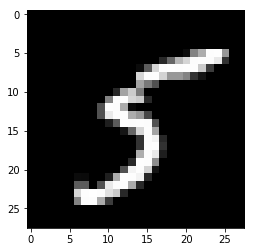

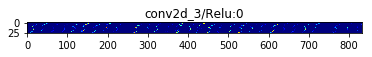

Displaying activation map 1


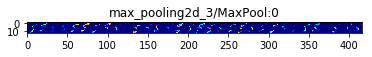

Displaying activation map 2


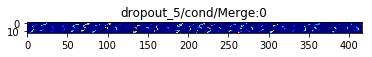

Displaying activation map 3


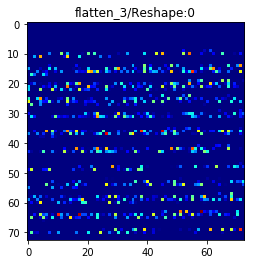

Displaying activation map 4


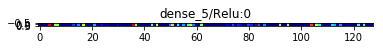

Displaying activation map 5


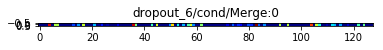

Displaying activation map 6


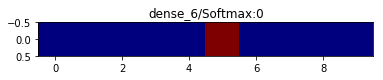

In [19]:
from keract import get_activations, display_activations
def print_names_and_shapes(activations):  
    for layer_name, layer_activations in activations.items():
        print(layer_name)
        print(layer_activations.shape)
        print('')
print_names_and_shapes(get_activations(model, train_images[0:500]))
test = train_images[17].reshape(1,28,28,1)
plt.imshow(np.squeeze(test), interpolation='None', cmap='gray')
plt.figure(figsize=(6,6))
a = get_activations(model, test)
display_activations(a)

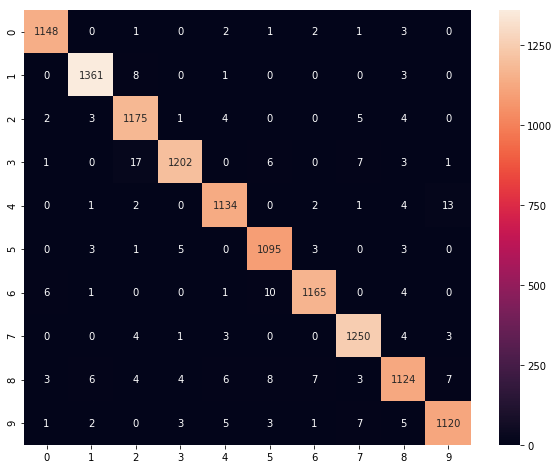

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(val_images)
y_pred_classes = np.argmax(y_prediction,axis = 1) 
y_true = np.argmax(val_labels,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,annot=True,fmt="d")

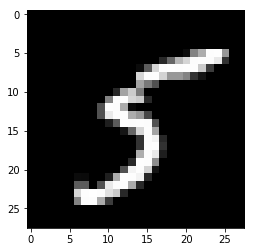

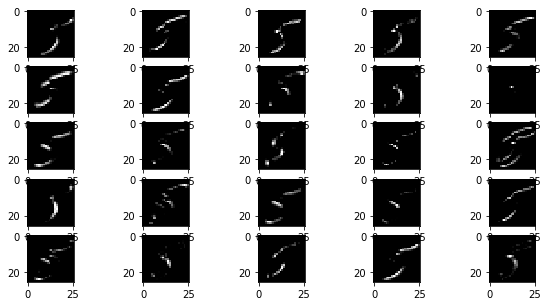

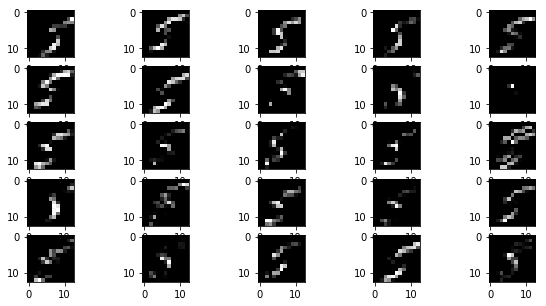

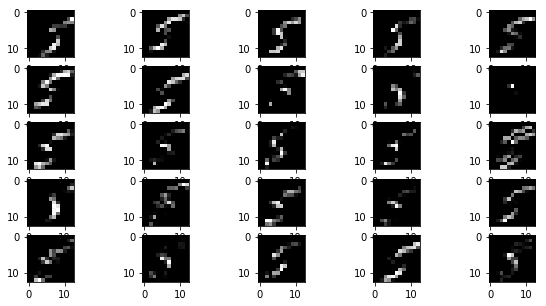

In [18]:
#Input Layer
#Activation index can only be given before the flatten Here flatten is index 3 of activations ie y we can show only till 0,1,2
from keras.models import Model
test = train_images[17].reshape(1,28,28,1)
plt.imshow(np.squeeze(test), interpolation='None', cmap='gray')
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test)
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index = 0
    fig, axis = plt.subplots(row_size, col_size, figsize=(row_size*2,col_size*1))
    for row in range(0,row_size):
        for col in range(0,col_size):
            axis[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
display_activation(activations, 5, 5, 0)
display_activation(activations, 5, 5, 1)
display_activation(activations, 5, 5, 2)   